<a href="https://colab.research.google.com/github/marcellinusc/plate-recognition/blob/master/character-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Character Recognition with CNN using Extended MNIST Balanced Dataset

##Initialization

In [ ]:
import tensorflow as tf
print(tf.__version__)

##Data Preparation

In [ ]:
#@title Load EMNIST dataset

import idx2numpy

X_train = idx2numpy.convert_from_file('./emnist-balanced-train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('./emnist-balanced-train-labels-idx1-ubyte')

X_test = idx2numpy.convert_from_file('./emnist-balanced-test-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('./emnist-balanced-test-labels-idx1-ubyte')

12


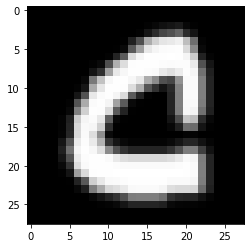

In [ ]:
#@title Show image example

import matplotlib.pyplot as plt

i=169
plt.imshow(X_train[i].transpose(),cmap='gray')
print(y_train[i])

In [ ]:
#@title Filter dataset to only include numbers and capital letters

import numpy as np

test_X=[]
test_Y=[]

for i in range(0,len(y_test)):
    if 0<=y_test[i]<=35:
        test_X.insert(i,X_test[i].transpose())
        test_Y.insert(i,y_test[i])

test_X=np.array(test_X)
test_Y=np.array(test_Y)

train_X=[]
train_Y=[]

for i in range(0,len(y_train)):
    if 0<=y_train[i]<=35:
        train_X.insert(i,X_train[i].transpose())
        train_Y.insert(i,y_train[i])

train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [ ]:
#@title Reshape dataset and one-hot-encode the labels

from tensorflow.keras.utils import to_categorical

train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
#@title Split 'train' into training set and validation set

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)
print('new training data shape, new validation data shape, new training label shape, new validation label shape:',train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

new training data shape, new validation data shape, new training label shape, new validation label shape: (69120, 28, 28, 1) (17280, 28, 28, 1) (69120, 36) (17280, 36)


##CNN Model

In [ ]:
#@title Build CNN for classifying 0-9 and A-Z characters

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D

num_classes=36

model = tf.keras.models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(36,activation='softmax'))

In [ ]:
#@title Show model layers

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
#@title Train model

batch_size=32
epochs=5

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
train_result=model.fit(train_X,train_label,
                       batch_size=batch_size,epochs=epochs,verbose=1,
                       validation_data=(valid_X,valid_label))

Train on 69120 samples, validate on 17280 samples
Epoch 1/5
69120/69120 [==============================] - 99s 1ms/sample - loss: 0.7203 - accuracy: 0.7848 - val_loss: 0.3516 - val_accuracy: 0.8699
Epoch 2/5
69120/69120 [==============================] - 97s 1ms/sample - loss: 0.3379 - accuracy: 0.8804 - val_loss: 0.3042 - val_accuracy: 0.8906
Epoch 3/5
69120/69120 [==============================] - 97s 1ms/sample - loss: 0.2923 - accuracy: 0.8929 - val_loss: 0.3164 - val_accuracy: 0.8895
Epoch 4/5
69120/69120 [==============================] - 134s 2ms/sample - loss: 0.2657 - accuracy: 0.9026 - val_loss: 0.2879 - val_accuracy: 0.8970
Epoch 5/5
69120/69120 [==============================] - 140s 2ms/sample - loss: 0.2454 - accuracy: 0.9090 - val_loss: 0.2782 - val_accuracy: 0.9014


##Finalization

In [ ]:
#@title Save model as HDF5 binary data format

model.save("model.h5py")
model.save("model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.h5py\assets
Test loss: 0.27415090054687524
Test accuracy: 0.90173614


In [ ]:
#@title Evaluate model using test set

test_eval=model.evaluate(test_X,test_Y_one_hot,verbose=0)
print('Test loss:',test_eval[0])
print('Test accuracy:',test_eval[1])

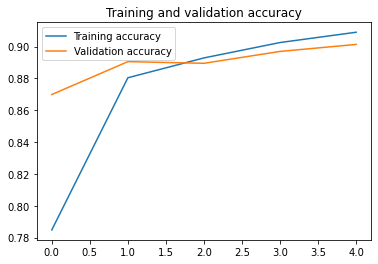

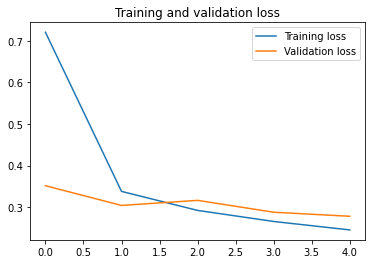

In [ ]:
#@title Show model accuracy and loss

accuracy = train_result.history['accuracy']
val_accuracy = train_result.history['val_accuracy']
loss = train_result.history['loss']
val_loss = train_result.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

A


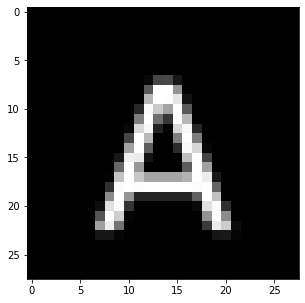

In [ ]:
#@title Check model performance

# Test with a new image from outside of EMNIST dataset
from PIL import Image
new_image = Image.open(r"a.png").convert('L')
new_image = new_image.resize((28,28))
new_image = np.array(new_image)

plt.figure(figsize=[5,5])
new_image = new_image.reshape(-1,28,28,1)
new_image = new_image.astype('float32')

# Make sure that the image contains white letter with black backgrounnd
if np.sum(new_image)/(255*28*28)>0.5:
    new_image = 255-new_image
    
plt.imshow(new_image[0,:,:,0],cmap="gray")
result = np.argmax(model.predict(new_image))
if result>=10:
    result = chr(result+55) #convert to ASCII
    
print(result)